https://blinkpy.readthedocs.io/en/latest/README.html

Load API secrets from json

In [1]:
!pip3 install blinkpy

     |████████████████████████████████| 78 kB 3.1 MB/s eta 0:00:01
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-none-any.whl size=6768 sha256=f88bd35d975e82d5f557d10a00feb5ff7c1bab82fb5d31ea7cbd69e1e2d9564c
  Stored in directory: /home/jovyan/.cache/pip/wheels/91/4d/4f/e740a68c215791688c46c4d6251770a570e8dfea91af1acb5c
Successfully built python-slugify


In [1]:
import json

def load_api_secrets(filename):
    """Convenience to load the API key from a json file."""
    try:
        with open(filename, 'r') as fp:
            api_params = json.load(fp)
    except Exception as e:
        print('Failed to load API secrets key: {}'.format(e))
        api_params = None
    return api_params['username'], api_params['password']

In [2]:
API_key_filepath = 'blink.json'
username, password = load_api_secrets(API_key_filepath)

In [6]:
username = 'yours'
password = 'yours'

In [5]:
from blinkpy.blinkpy import Blink
from blinkpy.auth import Auth

blink = Blink()

auth = Auth({"username": username, "password": password}, no_prompt=True)
blink.auth = auth
blink.start()

Login endpoint failed. Try again later.
Cannot setup Blink platform.


False

In [4]:
blink.cameras

{'Living_room': <blinkpy.camera.BlinkCamera at 0x111f5bac8>,
 'Kitchen': <blinkpy.camera.BlinkCamera at 0x111170e10>}

In [5]:
camera = blink.cameras['Kitchen']

In [6]:
type(camera)

blinkpy.camera.BlinkCamera

In [7]:
camera.attributes

{'name': 'Kitchen',
 'camera_id': '242898',
 'serial': '671100159',
 'temperature': 71,
 'temperature_c': 21.7,
 'temperature_calibrated': 71,
 'battery': 'ok',
 'battery_voltage': 172,
 'thumbnail': 'https://rest-prde.immedia-semi.com/media/production/account/4314/network/88118/camera/242898/clip_ruWq1_cf_2019_06_20__06_54AM.jpg',
 'video': None,
 'motion_enabled': True,
 'motion_detected': False,
 'wifi_strength': -60,
 'network_id': 88118,
 'sync_module': 'Amberwood',
 'last_record': None}

We can see the time of the last capture in the thumbnail

In [8]:
thumbnail = camera.attributes['thumbnail']

In [9]:
thumbnail[-22:-4]

'019_06_20__06_54AM'

Lets trigger another capture

In [10]:
camera.snap_picture()       # Take a new picture with the camera

{'id': 108596898,
 'created_at': '2019-06-20T07:03:06+00:00',
 'updated_at': '2019-06-20T07:03:06+00:00',
 'execute_time': '2019-06-20T07:03:06+00:00',
 'command': 'thumbnail',
 'state_stage': 'rest',
 'stage_rest': '2019-06-20T07:03:06+00:00',
 'stage_cs_db': None,
 'stage_cs_sent': None,
 'stage_sm': None,
 'stage_dev': None,
 'stage_is': None,
 'stage_lv': None,
 'stage_vs': None,
 'state_condition': 'new',
 'sm_ack': None,
 'lfr_ack': None,
 'sequence': None,
 'attempts': 0,
 'transaction': '4CIITbcyuntHR6pN',
 'player_transaction': 'Os2QdhpymH6Zq6iR',
 'server': None,
 'duration': None,
 'by_whom': '',
 'diagnostic': False,
 'debug': '',
 'target': None,
 'target_id': None,
 'parent_command_id': None,
 'camera_id': 242898,
 'siren_id': None,
 'firmware_id': None,
 'network_id': 88118,
 'account_id': 4314,
 'sync_module_id': 177751}

In [11]:
blink.refresh()             # Get new information from server

True

In [12]:
camera.image_to_file('kitchen_snap.jpg')

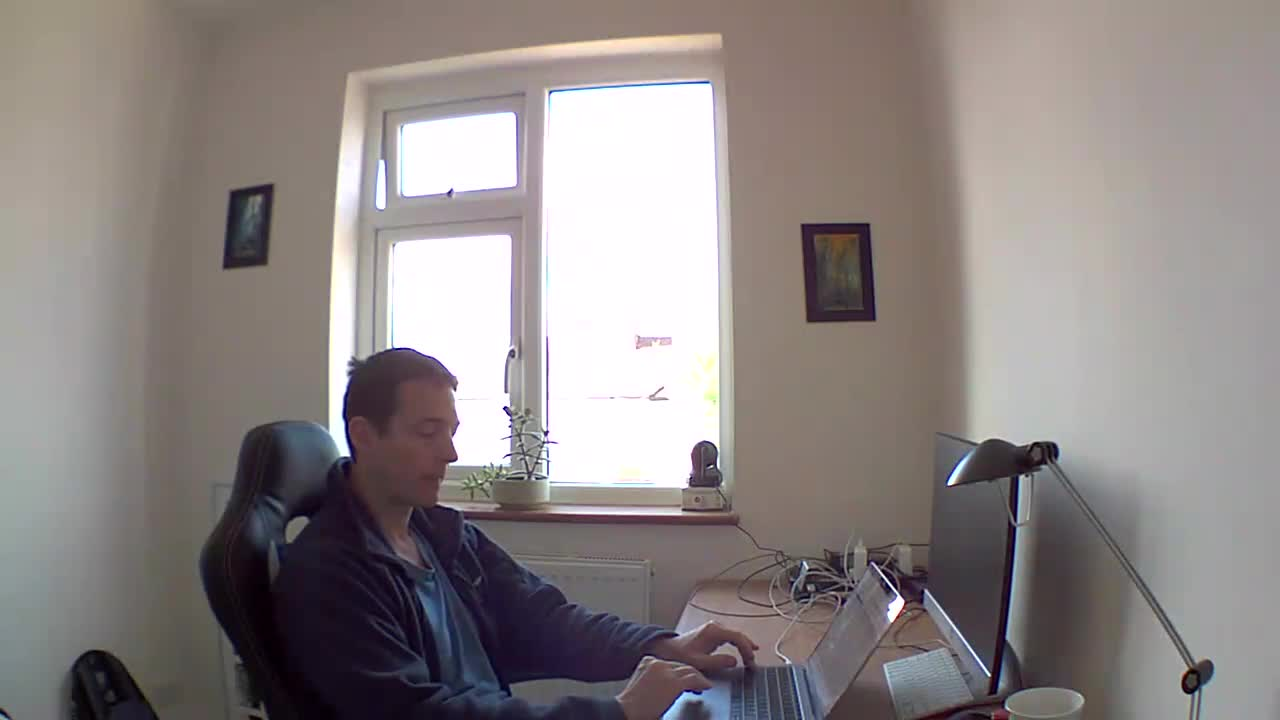

In [13]:
from IPython.display import Image
Image("kitchen_snap.jpg")

Videos are only created when motion is detected by the official app?

In [14]:
camera.video_to_file('Kitchen_camera_video.mp4')

No saved video exist for Kitchen.
NoneType: None


## Download all videos

In [18]:
blink.download_videos('.', since='2018/07/04 09:34')